In [1]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import transformers
import os
import warnings
warnings.filterwarnings("ignore")

## Load image dataset for computer vision

In [2]:
DIR = "../data/IMG_VALID" # Directory containing images

# Load images paths using glob
def load_image_paths(img_dir=DIR, num_images=None):
    image_paths = glob.glob(os.path.join(img_dir, "*.jpg"))
    print(f"Total Images: {len(image_paths)}")
    return image_paths[:num_images]

load_image_paths()

Total Images: 947


['../data/IMG_VALID/111_20220211T041351392Z_s00.mp4_2400.jpg',
 '../data/IMG_VALID/10_20220315T010303302Z_s00.mp4_44600.jpg',
 '../data/IMG_VALID/111_20220422T014816656Z_s00.mp4_14300.jpg',
 '../data/IMG_VALID/104_20220321T021706325Z_s00.mp4_2000.jpg',
 '../data/IMG_VALID/12_20220527T120309238Z_s00.mp4_1100.jpg',
 '../data/IMG_VALID/119_20220322T120533980Z_s00.mp4_36300.jpg',
 '../data/IMG_VALID/114_20220616T122504219Z_s00.mp4___750.jpg',
 '../data/IMG_VALID/104_20220506T124337874Z_s00.mp4_122600.jpg',
 '../data/IMG_VALID/122_20220425T120526983Z_s00.mp4_91000.jpg',
 '../data/IMG_VALID/13_20210802T102721443Z_s00frame632599236716.jpg',
 '../data/IMG_VALID/122_20220323T010604729Z_s00.mp4_62500.jpg',
 '../data/IMG_VALID/101_20220321T021439555Z_s00.mp4_900.jpg',
 '../data/IMG_VALID/123_20220503T061702133Z_s00.mp4___450.jpg',
 '../data/IMG_VALID/122_20220503T061600595Z_s00.mp4___500.jpg',
 '../data/IMG_VALID/120_20220322T011638792Z_s00.mp4_11900.jpg',
 '../data/IMG_VALID/131_20220504T1203192

## Visualization + YOLO Label Overlay

In [3]:
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


def visualize_yolo_grid(image_paths, labels_dir, cols=4, figsize=(16, 10)):

    total_images = len(image_paths)
    rows = math.ceil(total_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # Consistency in figure size
    axes = axes.flatten()

    for idx, img_path in enumerate(image_paths):

        # ======================
        # LOAD IMAGE
        # ======================

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        ax = axes[idx]
        ax.imshow(img)
        ax.axis("off")

        # ======================
        # LOAD LABEL
        # ======================

        label_file = os.path.join(
            labels_dir,
            os.path.basename(img_path).replace(".jpg", ".txt")
        )

        if os.path.exists(label_file):
            with open(label_file) as f:
                for line in f:
                    class_id, x_center, y_center, box_weight, box_height = map(float, line.split())

                    # Convert YOLO format to pixel values
                    x_center *= w
                    y_center *= h
                    box_weight *= w
                    box_height *= h

                    x_min = x_center - box_weight / 2
                    y_min = y_center - box_height / 2

                    rect = plt.Rectangle(
                        (x_min, y_min),
                        box_weight,
                        box_height,
                        fill=False,
                        linewidth=2
                    )
                    ax.add_patch(rect)

                    # Lable text
                    ax.text(
                        x_min,
                        y_min - 5,
                        f"ID: {int(class_id)}",
                        fontsize=10,
                        color="white",
                        bbox=dict(facecolor='black', alpha=0.6)
                    )

        # ======================
        # TITLE (FILENAME)
        # ======================

        filename = os.path.basename(img_path)
        ax.set_title(filename[:25], fontsize=12)

    # ======================
    # HIDE EMPTY SUBPLOTS
    # ======================

    for i in range(total_images, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

Total Images: 947


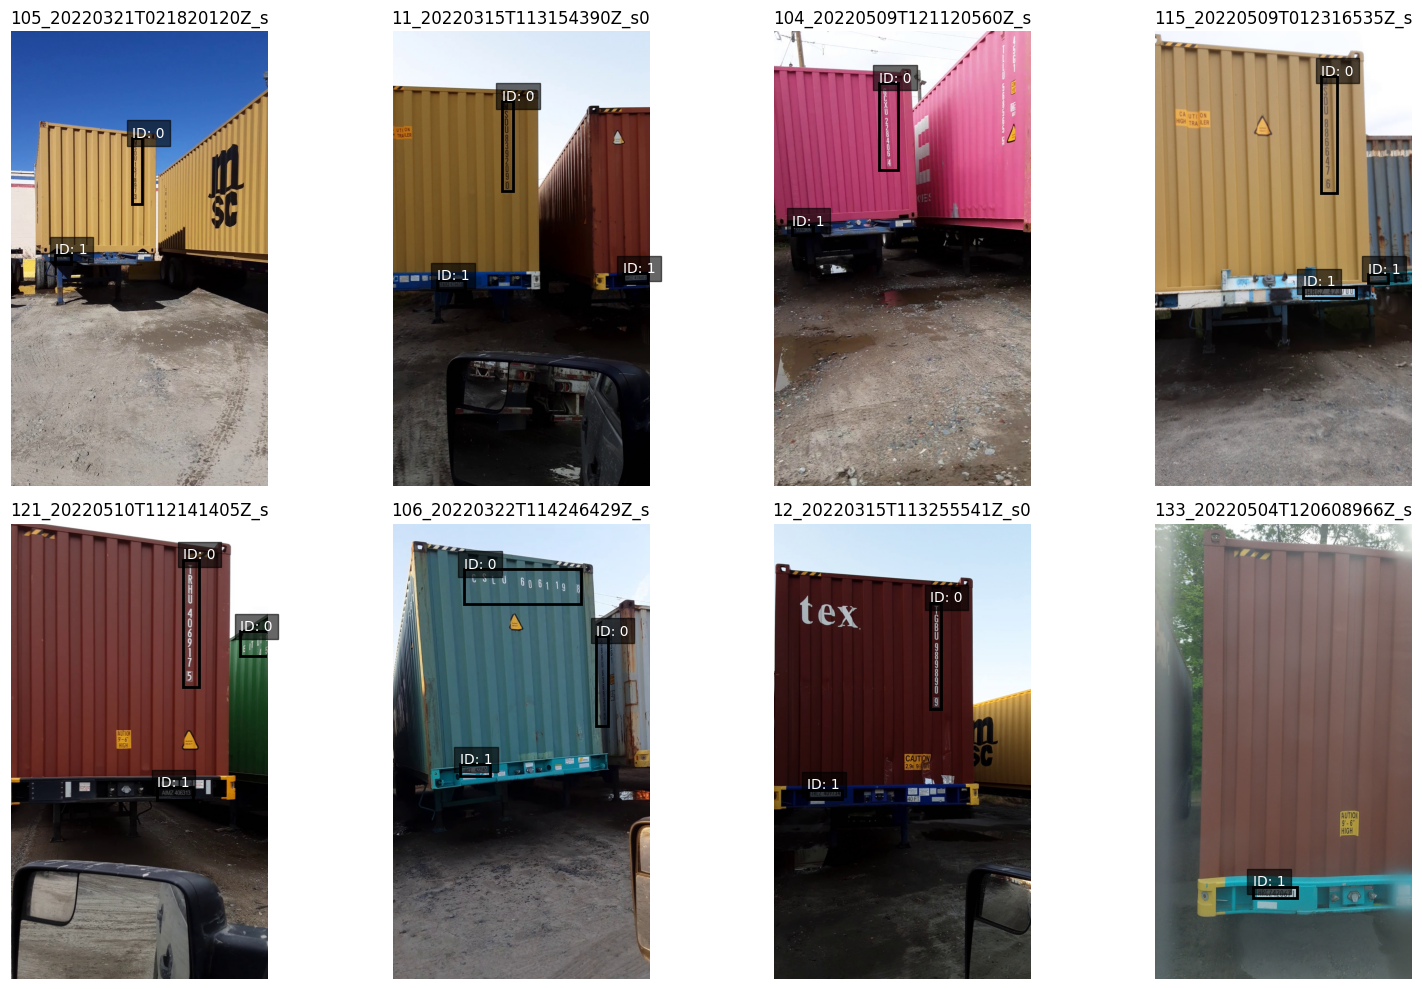

In [4]:
image_path = load_image_paths()[-8:]
visualize_yolo_grid(image_paths=image_path, labels_dir=DIR, cols=4)

## Load CSV dataset

In [5]:
import pandas as pd
import numpy as np

# Load data .csv
pd.set_option('display.max_columns', None)
csv_path = "../data/supply_chain_data_expanded.csv"
df = pd.read_csv(csv_path)
df.head()

,Order_id,Availability,Costs,Customer demographics,Defect rates,Inspection results,Lead time,Lead times,Location,Manufacturing costs,Manufacturing lead time,Number of products sold,Order quantities,Price,Product type,Production volumes,Revenue generated,Routes,Shipping carriers,Shipping costs,Shipping times,Stock levels,Supplier name,Transportation modes
0,6af613b6-569c-5c22-9c37-2ed93f31d3af,55,188.684667,Non-binary,0.224447,Pending,29,8,Mumbai,43.469393,29,802,98,71.933529,haircare,214,8763.759148,Route B,Carrier B,2.601292,6,59,Supplier 3,Road
1,b04965e6-a9bb-591f-8f8a-1adcb2c8dc39,55,187.492481,Non-binary,0.226086,Pending,29,8,Mumbai,51.332779,29,802,95,70.933955,haircare,213,8499.239523,Route B,Carrier B,3.220109,3,58,Supplier 3,Road
2,4b166dbe-d99d-5091-abdd-95b83330ed3a,55,188.968124,Non-binary,0.231951,Pending,29,9,Mumbai,47.134300,29,802,98,72.899584,haircare,213,8633.603195,Route B,Carrier B,3.257622,2,57,Supplier 3,Road
3,98123fde-012f-5ff3-8b50-881449dac91a,55,190.611596,Non-binary,0.233616,Pending,29,8,Mumbai,53.945541,29,802,98,65.259225,haircare,213,8658.388203,Route B,Carrier B,3.040814,6,59,Supplier 3,Road
4,6ed955c6-506a-5343-9be4-2c0afae02eef,55,187.312448,Non-binary,0.221073,Pending,29,8,Mumbai,40.762402,29,802,95,77.743599,haircare,216,8663.374800,Route B,Carrier B,2.703847,3,57,Supplier 3,Road


In [6]:
df.columns.tolist()

['Order_id',
 'Availability',
 'Costs',
 'Customer demographics',
 'Defect rates',
 'Inspection results',
 'Lead time',
 'Lead times',
 'Location',
 'Manufacturing costs',
 'Manufacturing lead time',
 'Number of products sold',
 'Order quantities',
 'Price',
 'Product type',
 'Production volumes',
 'Revenue generated',
 'Routes',
 'Shipping carriers',
 'Shipping costs',
 'Shipping times',
 'Stock levels',
 'Supplier name',
 'Transportation modes']

## Generate Synthetic Inspection Date (CORE FIX)

In [7]:
np.random.seed(42) # For reproducibility

# We accumulate random dates for around 4 years
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2025-12-31")

df["inspection_date"] = pd.to_datetime(
    np.random.uniform(
        start_date.value,
        end_date.value,
        size=len(df)
    )
)

df["inspection_date"] = df["inspection_date"].sort_values().values

In [8]:
# Rename kolom dengan nama yang SESUAI dengan CSV asli
df = df.rename(columns={
    "Order_id": "order_id",  # Sudah lowercase, tapi untuk konsistensi
    "Availability": "availability",
    "Costs": "costs",
    "Customer demographics": "customer_demographics",
    "Defect rates": "defect_rates",  # Plural!
    "Inspection results": "inspection_results",  # Plural!
    "Lead time": "lead_time",
    "Lead times": "lead_times",
    "Location": "location",
    "Manufacturing costs": "manufacturing_costs",
    "Manufacturing lead time": "manufacturing_lead_time",
    "Number of products sold": "products_sold",
    "Order quantities": "order_quantities",
    "Price": "price",
    "Product type": "product_type",
    "Production volumes": "production_volumes",
    "Revenue generated": "revenue_generated",
    "Routes": "routes",
    "Shipping carriers": "shipping_carriers",
    "Shipping costs": "shipping_costs",
    "Shipping times": "shipping_times",
    "Stock levels": "stock_levels",
    "Supplier name": "supplier_name",
    "Transportation modes": "transportation_modes"
})

## Create Synthetic Container Image Mapping

In [9]:
df["container_id"] = [f"CONT_{i:05d}" for i in range(len(df))]
df["container_image_path"] = df["container_id"].apply(
    lambda x: os.path.join(DIR, f"{x}.jpg")
)

df[["container_id", "container_image_path"]].head()

,container_id,container_image_path
0,CONT_00000,../data/IMG_VALID/CONT_00000.jpg
1,CONT_00001,../data/IMG_VALID/CONT_00001.jpg
2,CONT_00002,../data/IMG_VALID/CONT_00002.jpg
3,CONT_00003,../data/IMG_VALID/CONT_00003.jpg
4,CONT_00004,../data/IMG_VALID/CONT_00004.jpg


# Data visualizations

---

## Logistic-RAG Equivalent
* **Cumulative Inspections / Detected Damage / Risk Score Accumulation**
* **Daily Inspection Score / Damage Rate**
* **Monthly Inspection Performance**
* **Yearly Throughput / Accuracy**
* **Distribution of Risk Score / Damage Confidence**
* **Model Confidence Quantiles**

In [10]:
# create global time series adapter
def prepare_timeseries_adapter(df):
    df = df.copy()

    # Ensure datetime
    df["inspection_date"] = pd.to_datetime(df["inspection_date"])

    # Sorting for temporal logic
    df = df.sort_values("inspection_date")
    
    return df

In [11]:
"""Create visualization iterable function for inspection logistics total for 6 components
1. CUMULATIVE INSPECTION METRIC
2. DAILY PERFORMANCE LINE
3. MONTHLY HEATMAP (LIKE IMAGE)
4. YEARLY BAR PERFORMANCE
5. DISTRIBUTION HISTOGRAM
6. QUANTILE PLOT (MODEL STABILITY)"""

# Helper feature builder
def enrich_temporal_features(df):
    df = df.copy()
    df["date"] = df["inspection_date"].dt.date
    df["month"] = df["inspection_date"].dt.to_period("M")
    df["year"] = df["inspection_date"].dt.year
    return df

# create plot for CUMULATIVE INSPECTION METRIC
def plot_cumulative_inspections(df):
    temp = enrich_temporal_features(df)
    cumulative = temp.groupby("date")["defect_rates"].mean().cumsum()

    plt.figure(figsize=(14, 7))
    cumulative.plot()
    plt.title("Cumulative Inspection Metric")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Defect Rate")
    plt.show()

# create plot for DAILY PERFORMANCE LINE
def plot_daily_performance(df):
    df_ts = prepare_timeseries_adapter(df) # add timeseries adapter only here

    temp = enrich_temporal_features(df_ts)

    daily = (
        temp
        .set_index("inspection_date")
        .resample("D")["defect_rates"]
        .mean()
        .interpolate()
    )
    daily = daily.sort_index()
    
    # Smoothing 
    daily_smooth = daily.rolling(window=14).mean()

    plt.figure(figsize=(14, 7))

    plt.plot(daily, alpha=0.3, label="Raw") # raw line (light)
    plt.plot(daily_smooth, linewidth=2.5, label="14-Day moving avg") # smoothed line (main)

    plt.title("Daily Performance Line")
    plt.xlabel("Date")
    plt.ylabel("Average Defect Rate")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.show()

# create plot for MONTHLY HEATMAP (IMAGE-LIKE)
def plot_monthly_heatmap(df):
    temp = enrich_temporal_features(df)

    pivot = temp.pivot_table(
        values="defect_rates",
        index=temp["inspection_date"].dt.day,
        columns=temp["inspection_date"].dt.month,
        aggfunc="mean"
    )

    plt.figure(figsize=(16, 7))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd")
    plt.title("Monthly Heatmap of Defect Rates")
    plt.show()

# create plot for YEARLY BAR PERFORMANCE
def plot_yearly_bar(df):
    temp = enrich_temporal_features(df)
    yearly = temp.groupby("year")["defect_rates"].mean()

    yearly.plot(kind="bar", figsize=(6,4))
    plt.title("Yearly Inspection Performance")
    plt.ylabel("Avg Defect Rate")
    plt.show()

# create plot for DISTRIBUTION HISTOGRAM
def plot_distribution_histogram(df):
    plt.figure(figsize=(6,4))
    plt.hist(df["defect_rates"], bins=40)
    plt.title("Defect Rate Distribution")
    plt.xlabel("Defect Rate")
    plt.show()

# create plot for QUANTILE PLOT (MODEL STABILITY)
def plot_quantile(df):
    q = df["defect_rates"].quantile([0.15, 0.25, 0.35, 0.5, 0.65, 0.75, 0.85, 0.95])
    q.plot(marker='o', linestyle='--')

    plt.title("Inspection Quantile Stability")
    plt.ylabel("Defect Rate")
    plt.xlabel("Quantiles")
    plt.show()

Executed: plot_cumulative_inspections


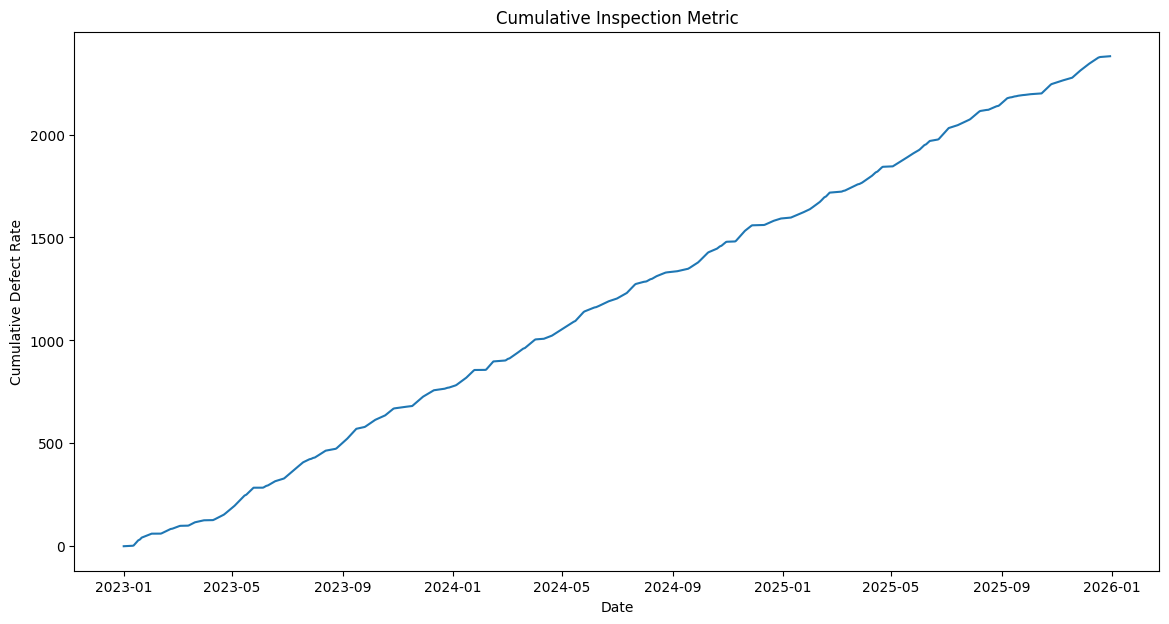

Executed: plot_daily_performance


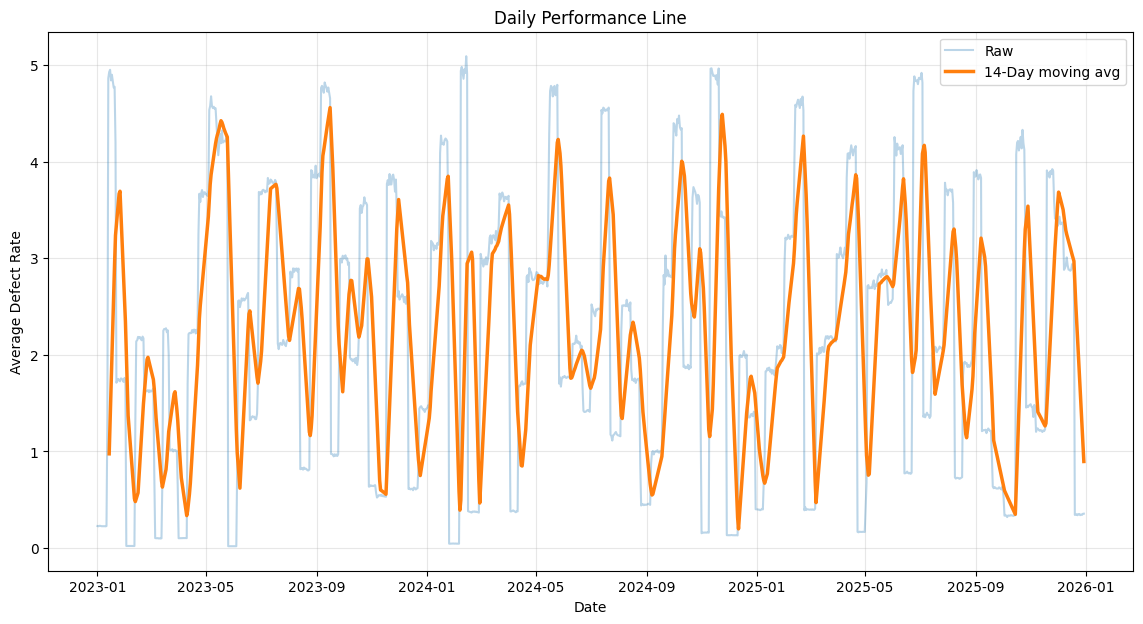

Executed: plot_monthly_heatmap


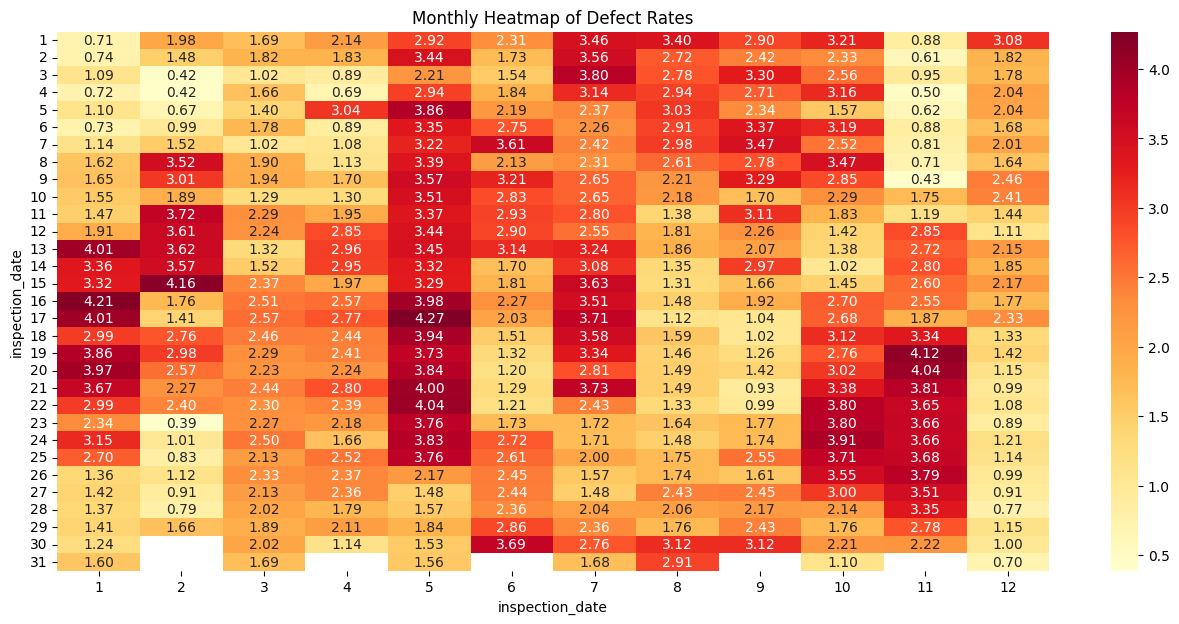

Executed: plot_yearly_bar


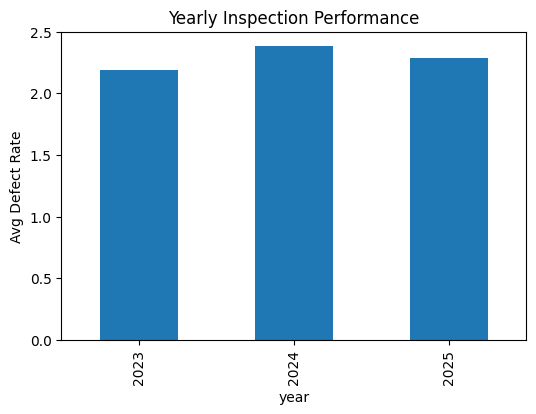

Executed: plot_distribution_histogram


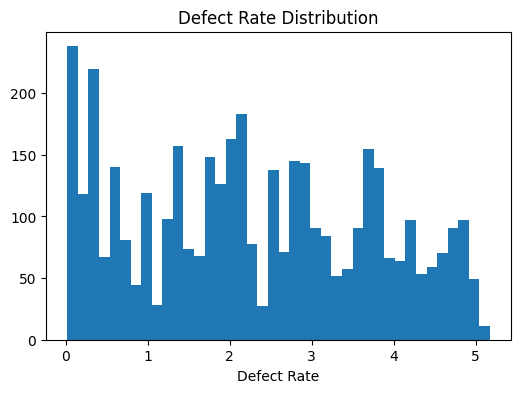

Executed: plot_quantile


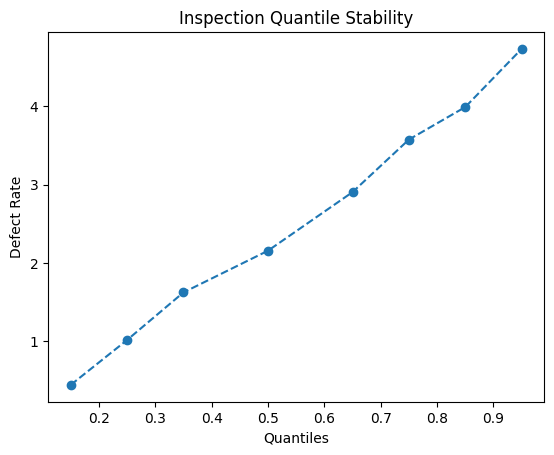

In [12]:
# ITERABLE EXECUTION

visualizer = [
    plot_cumulative_inspections,
    plot_daily_performance,
    plot_monthly_heatmap,
    plot_yearly_bar,
    plot_distribution_histogram,
    plot_quantile
]

for viz in visualizer:
    print(f"Executed: {viz.__name__}")
    viz(df)

Total Images: 947


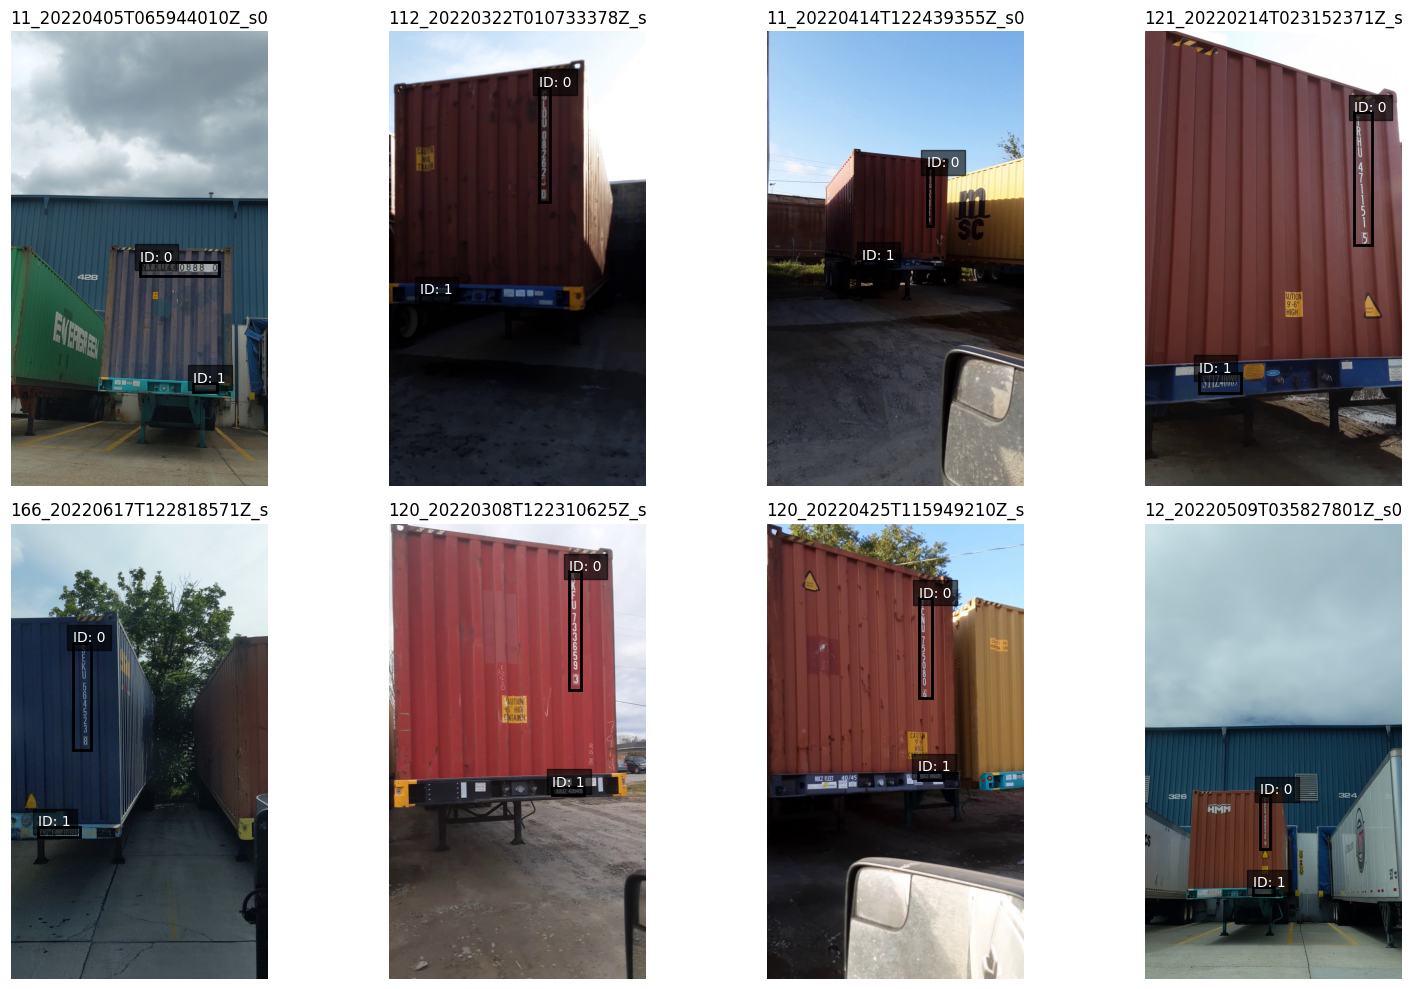

In [13]:
# execute container image
import random

image_path = load_image_paths()

sample_shuffle = random.sample(image_path, 8)

visualize_yolo_grid(image_paths=sample_shuffle, labels_dir=DIR, cols=4)

In [14]:
df.head()

,order_id,availability,costs,customer_demographics,defect_rates,inspection_results,lead_time,lead_times,location,manufacturing_costs,manufacturing_lead_time,products_sold,order_quantities,price,product_type,production_volumes,revenue_generated,routes,shipping_carriers,shipping_costs,shipping_times,stock_levels,supplier_name,transportation_modes,inspection_date,container_id,container_image_path
0,6af613b6-569c-5c22-9c37-2ed93f31d3af,55,188.684667,Non-binary,0.224447,Pending,29,8,Mumbai,43.469393,29,802,98,71.933529,haircare,214,8763.759148,Route B,Carrier B,2.601292,6,59,Supplier 3,Road,2023-01-01 00:18:20.740935680,CONT_00000,../data/IMG_VALID/CONT_00000.jpg
1,b04965e6-a9bb-591f-8f8a-1adcb2c8dc39,55,187.492481,Non-binary,0.226086,Pending,29,8,Mumbai,51.332779,29,802,95,70.933955,haircare,213,8499.239523,Route B,Carrier B,3.220109,3,58,Supplier 3,Road,2023-01-01 03:32:23.035768320,CONT_00001,../data/IMG_VALID/CONT_00001.jpg
2,4b166dbe-d99d-5091-abdd-95b83330ed3a,55,188.968124,Non-binary,0.231951,Pending,29,9,Mumbai,47.134300,29,802,98,72.899584,haircare,213,8633.603195,Route B,Carrier B,3.257622,2,57,Supplier 3,Road,2023-01-01 17:10:15.993145088,CONT_00002,../data/IMG_VALID/CONT_00002.jpg
3,98123fde-012f-5ff3-8b50-881449dac91a,55,190.611596,Non-binary,0.233616,Pending,29,8,Mumbai,53.945541,29,802,98,65.259225,haircare,213,8658.388203,Route B,Carrier B,3.040814,6,59,Supplier 3,Road,2023-01-02 11:34:23.821689088,CONT_00003,../data/IMG_VALID/CONT_00003.jpg
4,6ed955c6-506a-5343-9be4-2c0afae02eef,55,187.312448,Non-binary,0.221073,Pending,29,8,Mumbai,40.762402,29,802,95,77.743599,haircare,216,8663.374800,Route B,Carrier B,2.703847,3,57,Supplier 3,Road,2023-01-02 14:43:55.359941632,CONT_00004,../data/IMG_VALID/CONT_00004.jpg
